<a href="https://colab.research.google.com/github/vidyaofficial/Logo-Detection/blob/main/Pytorch_project_vidya_sobhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_path = '/content/drive/MyDrive/dataset'
files = os.listdir(folder_path)
print(files)

['file_mapping.csv', 'Logos.txt', 'output', 'genLogoOutput', 'train', 'val', 'file', 'output_dir']


In [3]:
#import all necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split

In [4]:
#check for cuda
# Define device (use CUDA if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [5]:
# set the Hyperparameters
num_epochs = 10
learning_rate = 0.001
batch_size = 32
num_classes = 2  # 2 classes: logo detected and not detected


# setting the Paths
file_mapping_path = "/content/drive/MyDrive/dataset/file_mapping.csv"
output_dir = "/content/drive/MyDrive/dataset/output"
train_dir = "/content/drive/MyDrive/dataset/output/train"
val_dir = "/content/drive/MyDrive/dataset/output/val"


def inspect_folder_structure(folder):
    print(f"Inspecting folder: {folder}")
    for subdir, dirs, files in os.walk(folder):
        print(f"Directory: {subdir}")
        for file in files:
            print(f"  File: {file}")

inspect_folder_structure(os.path.join(output_dir, "train"))
inspect_folder_structure(os.path.join(output_dir, "val"))

output_dir = "/content/drive/MyDrive/dataset/output"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")

# Create train/val directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Iterate through the classes and split data
for class_name in os.listdir(output_dir):
    class_path = os.path.join(output_dir, class_name)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if len(images) == 0:
            print(f"Warning: No images found in directory: {class_path}. Skipping this directory.")
            continue  # Skip to the next class if no images are found

        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)


        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        for img in train_images:
            shutil.copy(img, os.path.join(train_dir, class_name))
        for img in val_images:
            shutil.copy(img, os.path.join(val_dir, class_name))

Inspecting folder: /content/drive/MyDrive/dataset/output/train
Directory: /content/drive/MyDrive/dataset/output/train
Directory: /content/drive/MyDrive/dataset/output/train/Mercedes Benz
  File: 000002.jpg
  File: 000005.jpg
  File: 000003.jpg
  File: 000001.jpg
Directory: /content/drive/MyDrive/dataset/output/train/Lg
  File: 000001.jpg
  File: 000004.jpg
  File: 000005.jpg
  File: 000003.jpg
Directory: /content/drive/MyDrive/dataset/output/train/Pepsi
  File: 000005.jpg
  File: 000002.jpg
  File: 000001.jpg
  File: 000004.jpg
Directory: /content/drive/MyDrive/dataset/output/train/Tesla
  File: 000003.jpg
  File: 000004.jpg
  File: 000001.jpg
  File: 000005.jpg
Directory: /content/drive/MyDrive/dataset/output/train/Tiktok
  File: 000001.jpg
  File: 000004.jpg
  File: 000002.jpg
Directory: /content/drive/MyDrive/dataset/output/train/McDonald
  File: 000004.jpg
  File: 000003.jpg
  File: 000005.jpg
  File: 000002.jpg
  File: 000001.jpg
Directory: /content/drive/MyDrive/dataset/output/tr

In [6]:
#Data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [7]:
#Load training and validation datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)

# Print the class-to-index mapping to check labels
print("Class-to-index mapping for train_dataset:", train_dataset.class_to_idx)
print("Class-to-index mapping for val_dataset:", val_dataset.class_to_idx)

num_classes = len(train_dataset.classes)
print(f"Number of classes detected: {num_classes}")

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


Class-to-index mapping for train_dataset: {'Adidas': 0, 'Amazon': 1, 'Android': 2, 'Apple': 3, 'Ariel': 4, 'BMW': 5, 'Bic': 6, 'Burger King': 7, 'Cadbury': 8, 'Chevrolet': 9, 'Chrome': 10, 'Coca Cola': 11, 'Cowbell': 12, 'Dominos': 13, 'Fila': 14, 'Gillette': 15, 'Google': 16, 'Goya oil': 17, 'Guinness': 18, 'Heinz': 19, 'Honda': 20, 'Hp': 21, 'Huawei': 22, 'Instagram': 23, 'Kfc': 24, 'Krisspy Kreme': 25, 'Lays': 26, 'Levis': 27, 'Lg': 28, 'Lipton': 29, 'Mars': 30, 'Marvel': 31, 'McDonald': 32, 'Mercedes Benz': 33, 'Microsoft': 34, 'MnM': 35, 'Mtn': 36, 'Mtn dew': 37, 'NASA': 38, 'Nescafe': 39, 'Nestle': 40, 'Nestle milo': 41, 'Netflix': 42, 'Nike': 43, 'Nutella': 44, 'Oral b': 45, 'Oreo': 46, 'Pay pal': 47, 'Peak milk': 48, 'Pepsi': 49, 'PlayStation': 50, 'Pringles': 51, 'Puma': 52, 'Reebok': 53, 'Rolex': 54, 'Samsung': 55, 'Sprite': 56, 'Starbucks': 57, 'Tesla': 58, 'Tiktok': 59, 'Twitter': 60, 'YouTube': 61, 'Zara': 62}
Class-to-index mapping for val_dataset: {'Adidas': 0, 'Amazon':

In [8]:
#Define the CNN model (using a pre-trained ResNet)
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 128MB/s]


In [9]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [10]:

#Training the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        print(f"Validation Loss: {val_running_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_logo_detector_model.pth")
            print(f"Model saved with Validation Accuracy: {best_val_accuracy:.2f}%")

    print("Training complete")

#Train and evaluate
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Load the best saved model for visualization
if os.path.exists("best_logo_detector_model.pth"):
    model.load_state_dict(torch.load("best_logo_detector_model.pth"))
    print("Loaded the best saved model for visualization")






Epoch [1/10], Loss: 3.3955, Accuracy: 26.88%
Validation Loss: 2.9336, Validation Accuracy: 42.31%
Model saved with Validation Accuracy: 42.31%
Epoch [2/10], Loss: 0.9016, Accuracy: 90.12%
Validation Loss: 1.1296, Validation Accuracy: 73.08%
Model saved with Validation Accuracy: 73.08%
Epoch [3/10], Loss: 0.2451, Accuracy: 98.81%
Validation Loss: 0.3196, Validation Accuracy: 95.19%
Model saved with Validation Accuracy: 95.19%
Epoch [4/10], Loss: 0.0786, Accuracy: 99.60%
Validation Loss: 0.1562, Validation Accuracy: 96.15%
Model saved with Validation Accuracy: 96.15%
Epoch [5/10], Loss: 0.0314, Accuracy: 100.00%
Validation Loss: 0.1274, Validation Accuracy: 96.15%
Epoch [6/10], Loss: 0.0156, Accuracy: 100.00%
Validation Loss: 0.1190, Validation Accuracy: 96.15%
Epoch [7/10], Loss: 0.0080, Accuracy: 100.00%
Validation Loss: 0.1071, Validation Accuracy: 96.15%
Epoch [8/10], Loss: 0.0069, Accuracy: 100.00%
Validation Loss: 0.1005, Validation Accuracy: 96.15%
Epoch [9/10], Loss: 0.0045, Accu

<ipython-input-10-488355e8b761>:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_logo_detector_model.pth"))


Visualizing classification results (Detected and Not Detected)...
Total Detected Images: 2
Total Not Detected Images: 102


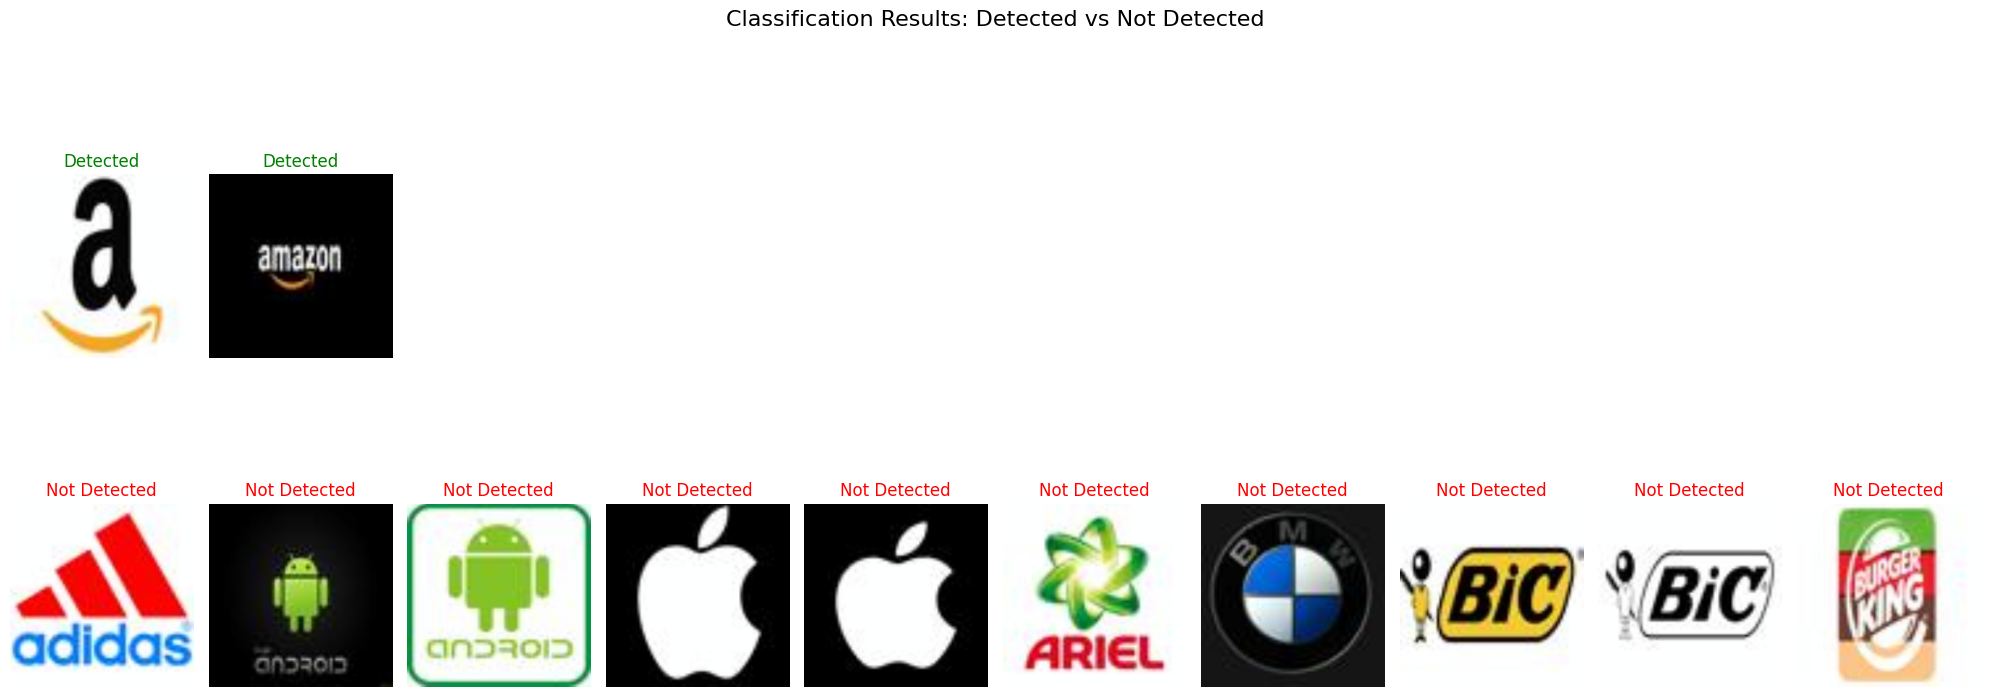

In [11]:
#Visualize detected and non-detected images
def count_and_visualize_results(model, dataloader, num_images_per_class=10):
    model.eval()
    detected_images, not_detected_images = [], []
    detected_count, not_detected_count = 0, 0  # Initialize counters

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for i in range(images.size(0)):
                img = images[i].cpu().numpy().transpose((1, 2, 0))
                img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize
                img = img.clip(0, 1)

                if predicted[i].item() == 1:  # Detected
                    detected_images.append(img)
                    detected_count += 1
                else:  # Not Detected
                    not_detected_images.append(img)
                    not_detected_count += 1

    print(f"Total Detected Images: {detected_count}")
    print(f"Total Not Detected Images: {not_detected_count}")

    # Visualize the first num_images_per_class images
    fig, axes = plt.subplots(2, num_images_per_class, figsize=(20, 8))
    fig.suptitle("Classification Results: Detected vs Not Detected", fontsize=16)

    for i in range(num_images_per_class):
        # Detected images
        if i < len(detected_images):
            ax = axes[0, i]
            ax.imshow(detected_images[i])
            ax.axis("off")
            ax.set_title("Detected", color="green")
        else:
            axes[0, i].axis("off")

        # Not Detected images
        if i < len(not_detected_images):
            ax = axes[1, i]
            ax.imshow(not_detected_images[i])
            ax.axis("off")
            ax.set_title("Not Detected", color="red")
        else:
            axes[1, i].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Visualize classification results
print("Visualizing classification results (Detected and Not Detected)...")
# Call the function to count and visualize
count_and_visualize_results(model, val_loader, num_images_per_class=10)

